## LSTM(RNN)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('E:\SkillEnable Class\Python\Datasets')

In [7]:
data = pd.read_csv('monthly_milk_production.csv', index_col='Date', parse_dates=True)

In [8]:
data.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [10]:
data.shape

(168, 1)

<AxesSubplot:xlabel='Date'>

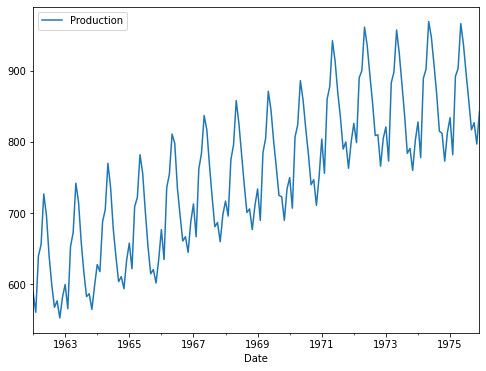

In [12]:
data.plot(figsize=(8,6))

In [13]:
train = data.iloc[:156]
test = data.iloc[156:]

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)

In [18]:
test_scaled

array([[0.2826087 ],
       [0.        ],
       [0.59782609],
       [0.6576087 ],
       [1.        ],
       [0.8423913 ],
       [0.61956522],
       [0.41304348],
       [0.19021739],
       [0.24456522],
       [0.08152174],
       [0.33152174]])

In [19]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
n_input = 12
generator = TimeseriesGenerator(train_scaled, train_scaled, length = n_input, batch_size = 1)

In [22]:
generator[1]

(array([[[0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154],
         [0.11298077]]]),
 array([[0.03125]]))

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [25]:
rnn = Sequential()

In [26]:
rnn.add(LSTM(units=100, activation='relu', input_shape=(n_input,1)))

In [27]:
rnn.add(Dense(units=1))

In [28]:
rnn.compile(optimizer='adam', loss='mse')

In [29]:
rnn.fit(generator, epochs = 50)

Epoch 1/50
144/144 [==============================] - 2s 4ms/step - loss: 0.0395
Epoch 2/50
144/144 [==============================] - 1s 3ms/step - loss: 0.0209
Epoch 3/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 4/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 5/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 6/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0108
Epoch 7/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 8/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 9/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 10/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 11/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 12/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 13/50
144/144 [====

In [30]:
test_scaled

array([[0.2826087 ],
       [0.        ],
       [0.59782609],
       [0.6576087 ],
       [1.        ],
       [0.8423913 ],
       [0.61956522],
       [0.41304348],
       [0.19021739],
       [0.24456522],
       [0.08152174],
       [0.33152174]])

In [32]:
predict_train = train_scaled[-12:]

In [33]:
predict_train= predict_train.reshape(1, n_input, 1)

In [34]:
rnn.predict(predict_train)

array([[0.60348076]], dtype=float32)

In [35]:
test_scaled[0]

array([0.2826087])